In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_percentage_error


In [3]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df.shape

(235692, 17)

In [5]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
235691,WBY33AW03P,King,Issaquah,WA,98027.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,229583490,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235692.000000,235656.000000,235656.000000,235198.000000,2.356920e+05,2.356890e+05
mean,98177.656463,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.218661,2.991908,84.045829,7177.668305,14.904644,6.799098e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [8]:
df['Electric Range'].value_counts()

Electric Range
0.0      139761
215.0      6403
32.0       5417
25.0       4668
21.0       4574
          ...  
51.0          5
11.0          4
95.0          3
57.0          2
45.0          1
Name: count, Length: 109, dtype: int64

In [9]:
df= df[df['Electric Range'] != 0.0]

In [10]:
df.shape

(95931, 17)

In [11]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95931 entries, 0 to 235689
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         95931 non-null  object 
 1   County                                             95929 non-null  object 
 2   City                                               95929 non-null  object 
 3   State                                              95931 non-null  object 
 4   Postal Code                                        95929 non-null  float64
 5   Model Year                                         95931 non-null  int64  
 6   Make                                               95931 non-null  object 
 7   Model                                              95931 non-null  object 
 8   Electric Vehicle Type                              95931 non-null  object 
 9   Clean Alte

In [13]:
df.nunique()

VIN (1-10)                                            7599
County                                                 154
City                                                   619
State                                                   41
Postal Code                                            740
Model Year                                              20
Make                                                    36
Model                                                  102
Electric Vehicle Type                                    2
Clean Alternative Fuel Vehicle (CAFV) Eligibility        2
Electric Range                                         108
Base MSRP                                               31
Legislative District                                    49
DOL Vehicle ID                                       95931
Vehicle Location                                       739
Electric Utility                                        73
2020 Census Tract                                     19

In [14]:
df.drop_duplicates()
df.shape

(95931, 17)

In [15]:
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility'}, inplace=True)

In [16]:
df.drop(columns=['DOL Vehicle ID'],axis=1,inplace=True)

##### Top 15 Brands

C:\Users\anjuc\AppData\Local\Temp\ipykernel_23944\2927176844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Make'].value_counts().head(15).values,


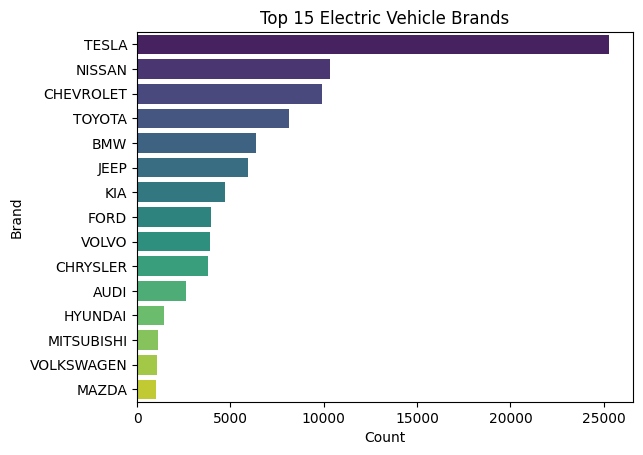

In [17]:
plt.figure()
sns.barplot(x=df['Make'].value_counts().head(15).values,
            y=df['Make'].value_counts().head(15).index,
            palette="viridis")
plt.title("Top 15 Electric Vehicle Brands")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

##### CAFV DISTRIBUTION

In [18]:
cafv=df['CAFV Eligibility'].value_counts()
cafv

CAFV Eligibility
Clean Alternative Fuel Vehicle Eligible    73317
Not eligible due to low battery range      22614
Name: count, dtype: int64

<Axes: xlabel='CAFV Eligibility', ylabel='count'>

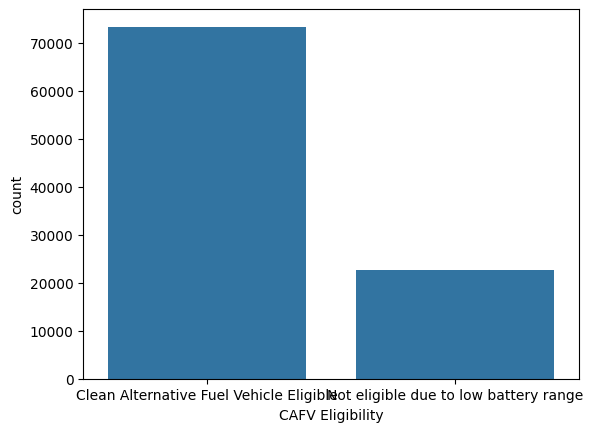

In [19]:
sns.countplot(x=df['CAFV Eligibility'],data=df)

##### Top 10 EV Models

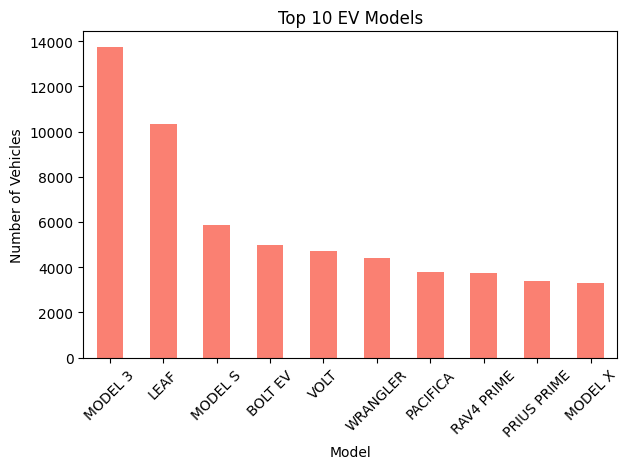

In [20]:
top_models = df['Model'].value_counts().head(10)
top_models.plot(kind='bar', color='salmon')
plt.title("Top 10 EV Models")
plt.xlabel("Model")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Top 20 Cities

C:\Users\anjuc\AppData\Local\Temp\ipykernel_23944\12016700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['City'].value_counts().head(20).values,


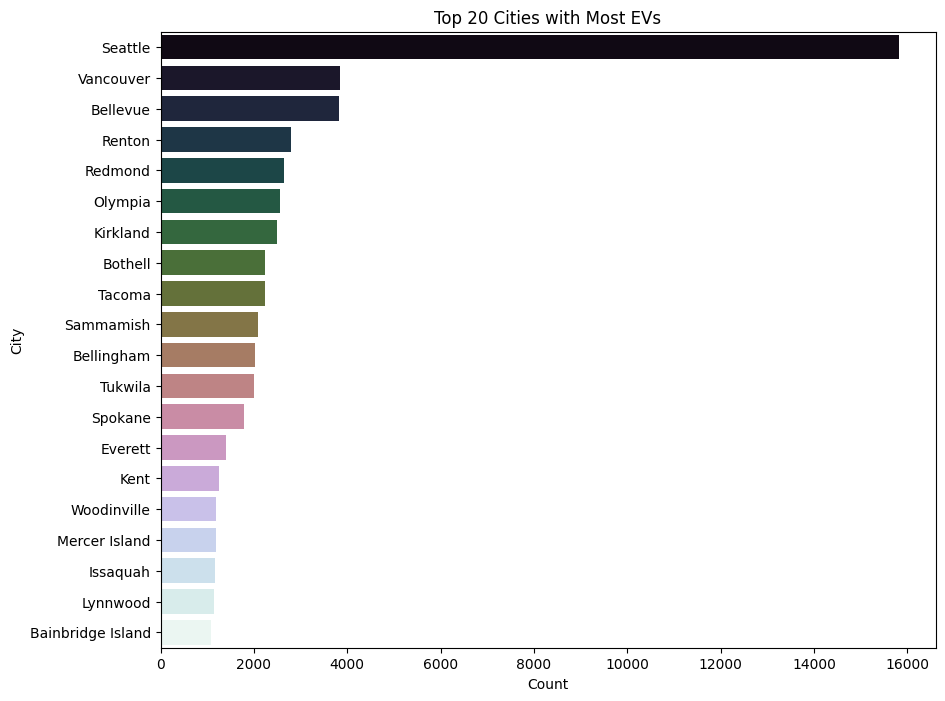

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['City'].value_counts().head(20).values,
            y=df['City'].value_counts().head(20).index,
            palette='cubehelix')
plt.title("Top 20 Cities with Most EVs")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

##### EV Type Distribution

C:\Users\anjuc\AppData\Local\Temp\ipykernel_23944\3731445514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Electric Vehicle Type', data=df,palette='coolwarm')


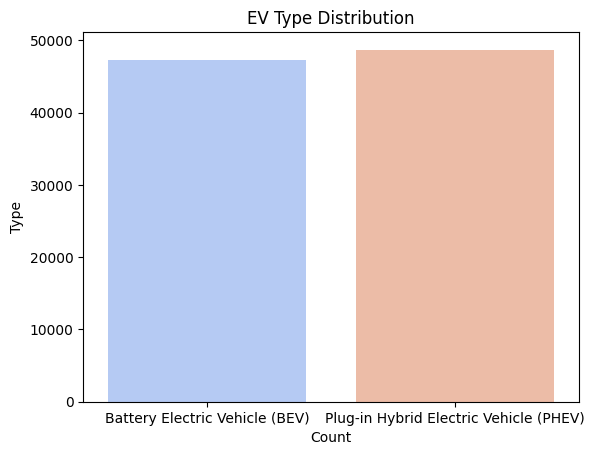

In [22]:
plt.figure()
sns.countplot(x='Electric Vehicle Type', data=df,palette='coolwarm')
plt.title("EV Type Distribution")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

##### EV Growth by Year

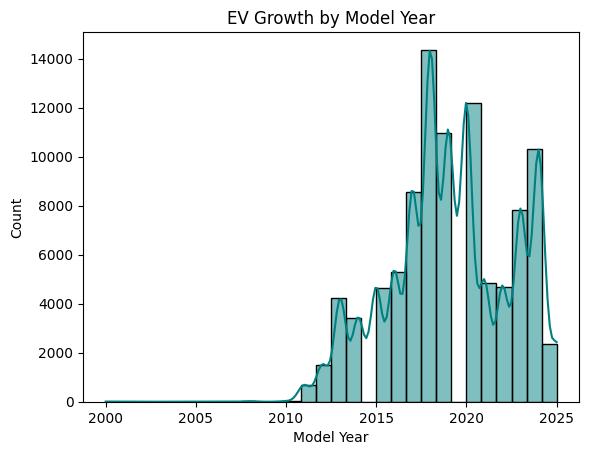

In [23]:
plt.figure()
sns.histplot(df['Model Year'], bins=30, kde=True, color='teal')
plt.title("EV Growth by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

In [24]:
df.isna().sum()

VIN (1-10)                 0
County                     2
City                       2
State                      0
Postal Code                2
Model Year                 0
Make                       0
Model                      0
Electric Vehicle Type      0
CAFV Eligibility           0
Electric Range            36
Base MSRP                 36
Legislative District     238
Vehicle Location           5
Electric Utility           2
2020 Census Tract          2
dtype: int64

In [25]:
columns_drop_missing=['Electric Range','County','City','Postal Code','Vehicle Location']
df = df.dropna(subset=columns_drop_missing)

In [26]:
df.isna().sum()

VIN (1-10)                 0
County                     0
City                       0
State                      0
Postal Code                0
Model Year                 0
Make                       0
Model                      0
Electric Vehicle Type      0
CAFV Eligibility           0
Electric Range             0
Base MSRP                  0
Legislative District     236
Vehicle Location           0
Electric Utility           0
2020 Census Tract          0
dtype: int64

In [27]:
df.shape

(95890, 16)

In [28]:
df['Legislative District']=df['Legislative District'].fillna(df['Legislative District'].mode()[0])

In [29]:
df.isna().sum()

VIN (1-10)               0
County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV Eligibility         0
Electric Range           0
Base MSRP                0
Legislative District     0
Vehicle Location         0
Electric Utility         0
2020 Census Tract        0
dtype: int64

In [30]:
df['Base MSRP'].value_counts()

Base MSRP
0.0         92638
69900.0      1318
31950.0       361
52900.0       215
32250.0       133
59900.0       126
54950.0       119
39995.0       117
36900.0       105
44100.0        91
64950.0        87
45600.0        79
52650.0        71
33950.0        71
34995.0        67
55700.0        57
36800.0        55
53400.0        38
98950.0        21
110950.0       21
81100.0        21
90700.0        17
75095.0        13
102000.0       11
184400.0       10
43700.0         8
109000.0        7
89100.0         6
91250.0         4
32995.0         2
845000.0        1
Name: count, dtype: int64

In [31]:
df.drop(columns=['Base MSRP'],axis=True,inplace=True)

In [32]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type', 'CAFV Eligibility',
       'Electric Range', 'Legislative District', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

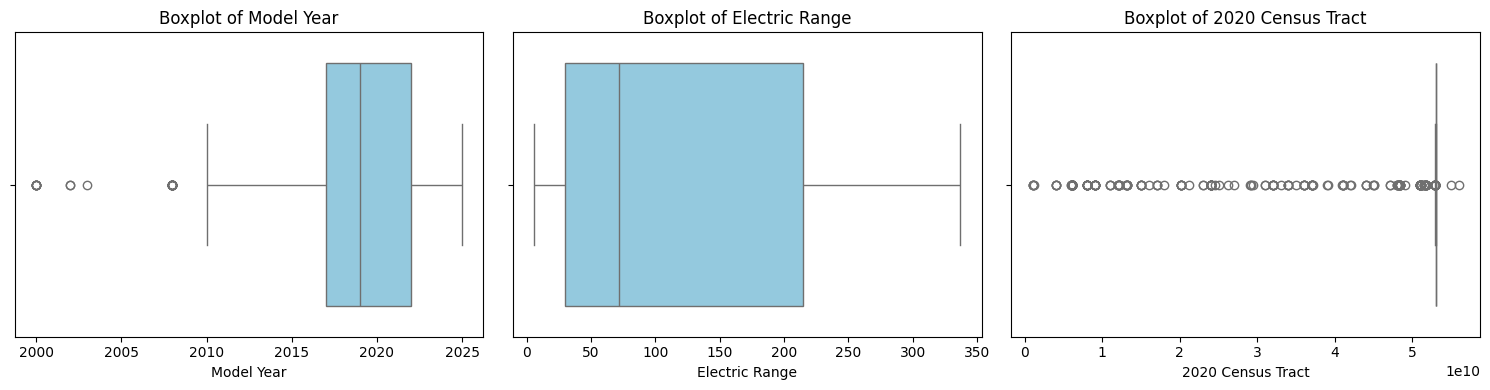

In [33]:
numeric_cols = df[['Model Year','Electric Range','2020 Census Tract']]

# Set number of plots per row
n_cols = 3
n_rows = (len(numeric_cols.columns) + n_cols - 1) // n_cols  # calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=numeric_cols[col], ax=axes[i],color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')


plt.tight_layout()
plt.show()

In [34]:
df['2020 Census Tract'].value_counts()

2020 Census Tract
5.303303e+10    1831
5.303303e+10     924
5.303301e+10     342
5.303303e+10     337
5.303301e+10     315
                ... 
5.105943e+10       1
4.849715e+10       1
6.073015e+09       1
2.403170e+10       1
3.604506e+10       1
Name: count, Length: 1988, dtype: int64

In [35]:
df.dtypes

VIN (1-10)                object
County                    object
City                      object
State                     object
Postal Code              float64
Model Year                 int64
Make                      object
Model                     object
Electric Vehicle Type     object
CAFV Eligibility          object
Electric Range           float64
Legislative District     float64
Vehicle Location          object
Electric Utility          object
2020 Census Tract        float64
dtype: object

In [36]:
corr = df.corr(numeric_only=True)
corr

,Postal Code,Model Year,Electric Range,Legislative District,2020 Census Tract
Postal Code,1.000000,0.003911,-0.006712,-0.085991,0.543163
Model Year,0.003911,1.000000,-0.193483,-0.064596,0.000761
Electric Range,-0.006712,-0.193483,1.000000,0.066831,0.001886
Legislative District,-0.085991,-0.064596,0.066831,1.000000,-0.036551
2020 Census Tract,0.543163,0.000761,0.001886,-0.036551,1.000000


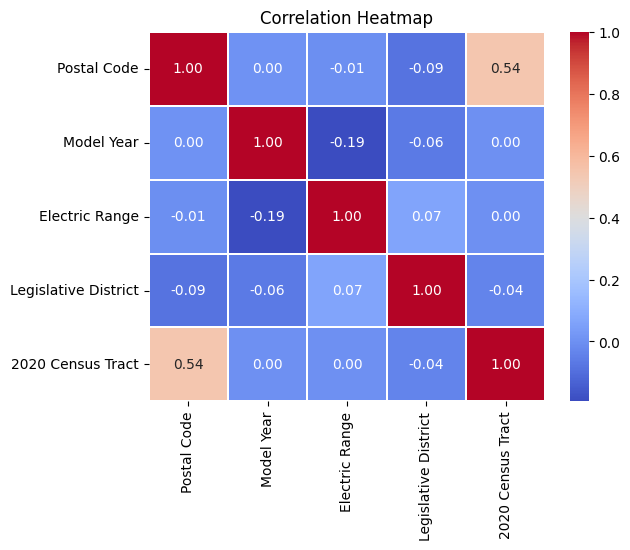

In [37]:
sns.heatmap(corr,annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
df.drop(columns=['Model Year','2020 Census Tract','Postal Code'],axis=1,inplace=True)

In [39]:
df['Electric Range'].unique()

array([220., 291.,  30.,  42., 265.,  81.,  22., 215.,  84., 289.,  26.,
       233., 208., 114., 210.,  75., 107., 238.,  32.,  25., 293.,  53.,
        39.,  82.,  33.,  28., 170.,  93.,  21., 150.,  38.,  16., 125.,
        14.,  37.,  47., 149., 151., 266.,  19.,  73., 259.,  23.,  13.,
       308.,  97., 192., 322., 258., 249.,  35.,  62.,  18., 239.,  17.,
        83., 200., 234.,  40.,  34., 222.,  72., 100.,  68.,  87.,  20.,
        54., 126.,   6.,  29.,  15., 103., 270., 288.,  41.,  76.,  58.,
        46.,  60., 124., 203., 330.,  48.,  31., 337., 153., 218.,  56.,
       204.,   8., 111.,  36.,  10., 110.,  49.,  27.,  59.,  24.,  43.,
        12., 245.,  11.,  55.,   9.,  95.,  57.,  51.,  45.])

In [40]:
df.dtypes

VIN (1-10)                object
County                    object
City                      object
State                     object
Make                      object
Model                     object
Electric Vehicle Type     object
CAFV Eligibility          object
Electric Range           float64
Legislative District     float64
Vehicle Location          object
Electric Utility          object
dtype: object

In [41]:
df['Legislative District'].unique()

array([37., 23., 35.,  2., 22., 48., 39., 45., 41., 46., 11., 26.,  5.,
       21., 14.,  1., 33., 10., 15., 44., 38., 34., 32., 43., 31., 47.,
        6., 13., 12., 36., 40., 16.,  9., 20.,  7.,  3., 24., 49., 17.,
       30., 18., 19., 27.,  4., 29., 25., 28., 42.,  8.])

In [42]:

categorical_columns=['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type','2020 Census Tract','Postal Code',
       'Legislative District', 'Vehicle Location']


target=df['Electric Range']
categorical_columns=df.columns
def anova_for_categoricals(df,categorical_columns, target):
    results = []

    for col in categorical_columns:
        try:
            # Group target values by each category in the column
            groups = [group[target].values for name, group in df.groupby(col)]
            
            # Apply One-Way ANOVA
            f_stat, p_val = f_oneway(*groups)
            
            results.append({
                'Feature': col,
                'F-statistic': f_stat,
                'p-value': p_val
            })
        except Exception as e:
            results.append({
                'Feature': col,
                'F-statistic': None,
                'p-value': None,
            })

    return pd.DataFrame(results)


anova_results = anova_for_categoricals(df, categorical_columns, target='Electric Range')
print(anova_results.sort_values(by='p-value'))

c:\Users\anjuc\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


                  Feature   F-statistic        p-value
0              VIN (1-10)           inf   0.000000e+00
2                    City  6.189965e+00   0.000000e+00
5                   Model  1.128752e+04   0.000000e+00
4                    Make  8.263198e+03   0.000000e+00
6   Electric Vehicle Type  2.488307e+05   0.000000e+00
7        CAFV Eligibility  3.664619e+04   0.000000e+00
9    Legislative District  5.096429e+01   0.000000e+00
8          Electric Range           inf   0.000000e+00
10       Vehicle Location  6.465802e+00   0.000000e+00
11       Electric Utility  9.791902e+00  3.501322e-104
1                  County  5.535337e+00   5.214036e-96
3                   State  1.072181e+00   3.507224e-01


c:\Users\anjuc\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [43]:
anova_results['Significant'] = anova_results['p-value'] < 0.05  # Mark significance
anova_results

,Feature,F-statistic,p-value,Significant
0,VIN (1-10),inf,0.000000e+00,True
1,County,5.535337e+00,5.214036e-96,True
2,City,6.189965e+00,0.000000e+00,True
3,State,1.072181e+00,3.507224e-01,False
4,Make,8.263198e+03,0.000000e+00,True
5,Model,1.128752e+04,0.000000e+00,True
6,Electric Vehicle Type,2.488307e+05,0.000000e+00,True
7,CAFV Eligibility,3.664619e+04,0.000000e+00,True
8,Electric Range,inf,0.000000e+00,True
9,Legislative District,5.096429e+01,0.000000e+00,True


In [44]:
df.drop(columns=['State'],axis=1,inplace=True)

In [45]:
df.dtypes

VIN (1-10)                object
County                    object
City                      object
Make                      object
Model                     object
Electric Vehicle Type     object
CAFV Eligibility          object
Electric Range           float64
Legislative District     float64
Vehicle Location          object
Electric Utility          object
dtype: object

In [46]:
categorical_features= df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_features:
    encoder = LabelEncoder()
    df[col] =encoder.fit_transform(df[col])

In [47]:
df.dtypes

VIN (1-10)                 int64
County                     int64
City                       int64
Make                       int64
Model                      int64
Electric Vehicle Type      int64
CAFV Eligibility           int64
Electric Range           float64
Legislative District     float64
Vehicle Location           int64
Electric Utility           int64
dtype: object

In [50]:
df.head()

,VIN (1-10),County,City,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Legislative District,Vehicle Location,Electric Utility
0,2177,61,495,30,54,0,0,220.0,37.0,332,54
1,2934,63,434,30,57,0,0,291.0,23.0,483,70
3,2076,63,492,4,97,1,0,30.0,35.0,520,70
4,3741,136,446,32,73,1,0,42.0,2.0,499,70
5,2308,136,387,30,55,0,0,265.0,22.0,541,70


In [51]:
x=df.drop(['Electric Range'],axis=1)
y=df['Electric Range']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [53]:
knn=KNeighborsRegressor()
bayes=BernoulliNB()
linear=LinearRegression()
tree=DecisionTreeRegressor()
random=RandomForestRegressor()
models=[knn,bayes,linear,tree,random]


In [54]:
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    score=r2_score(y_test,y_pred)
    print(f'score  of {i},',score)
    print('-'*100)
    MAPE=mean_absolute_percentage_error(y_test,y_pred)
    print(f'Mean absolute percentage error of {i} is,',MAPE)
    print("*"*100)

score  of KNeighborsRegressor(), 0.9206751279854196
----------------------------------------------------------------------------------------------------
Mean absolute percentage error of KNeighborsRegressor() is, 0.1738378448005733
****************************************************************************************************
score  of BernoulliNB(), 0.7122591985715845
----------------------------------------------------------------------------------------------------
Mean absolute percentage error of BernoulliNB() is, 0.35813060623634463
****************************************************************************************************
score  of LinearRegression(), 0.7307310617404923
----------------------------------------------------------------------------------------------------
Mean absolute percentage error of LinearRegression() is, 0.35197990779070537
****************************************************************************************************
score  of DecisionTre

##### THe Best Model is Random Forest

In [55]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred_=model.predict(x_test)
score_=r2_score(y_test,y_pred)
print(f"score  of RandomForestRegressor:{score_}")
MAPE_=mean_absolute_percentage_error(y_test,y_pred)
print(f'Mean absolute percentage error:{MAPE_}')


score  of RandomForestRegressor:0.9974673892187864
Mean absolute percentage error:0.00664108741568144


In [56]:
df.head()

,VIN (1-10),County,City,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Legislative District,Vehicle Location,Electric Utility
0,2177,61,495,30,54,0,0,220.0,37.0,332,54
1,2934,63,434,30,57,0,0,291.0,23.0,483,70
3,2076,63,492,4,97,1,0,30.0,35.0,520,70
4,3741,136,446,32,73,1,0,42.0,2.0,499,70
5,2308,136,387,30,55,0,0,265.0,22.0,541,70


In [57]:
print("Predicted Electric Range (km):", random.predict([[2934	,63	,434	,30	,57,0,	0,	23.0,	483	,70]]))


Predicted Electric Range (km): [291.]


c:\Users\anjuc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
print("Predicted Electric Range (km):", random.predict([[3741	,136,	446,	32,	73,	1,	0,		2.0,	499,	70]]))


Predicted Electric Range (km): [42.]


c:\Users\anjuc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [59]:
import pickle 

with open("electric_vehicle.pkl","wb") as f:
    pickle.dump(model,f)

# with open("encoding.pkl","wb") as f:
#     pickle.dump(lab,f)

In [60]:
import pickle
from sklearn.preprocessing import LabelEncoder

object_columns = [
    'VIN (1-10)',
    'County',
    'City',
    'Make',
    'Model',
    'Electric Vehicle Type',
    'CAFV Eligibility',
    'Vehicle Location',	
    'Electric Utility'
    
]

# Dictionary to store encoders
encoders = {}

# Apply LabelEncoder to each column and save encoder
for col in object_columns:
    lab = LabelEncoder()
    df[col] = lab.fit_transform(df[col])
    encoders[col] = lab
    # Save each encoder as a separate .pkl file
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(lab,f)

In [ ]:
#JTMAB3FV7P	
#Thurston	
# Rainier	
# TOYOTA	
# RAV4 PRIME	
# Plug-in Hybrid Electric Vehicle (PHEV)	
# Clean Alternative Fuel Vehicle Eligible		
# 2.0		
# POINT (-122.68993 46.88897)	
# PUGET SOUND ENERGY INC	